In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make synthetic dataset

N = 1000
X = np.random.random((N, 2)) * 6 - 3 # -> (-3, +3) range
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1]) # Non-linear function

y = cos(2x1) + cos(3x2)

<Axes3D: >

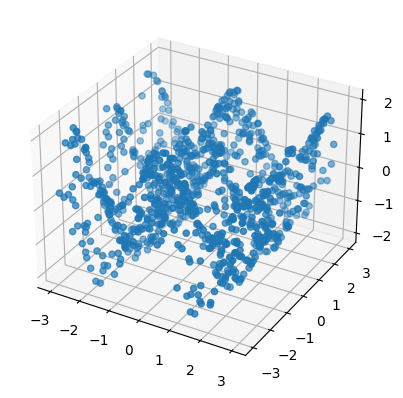

In [48]:
def plot3d():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], Y)

    return ax

plot3d()

In [18]:
X.shape

Y.shape

(1000,)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

learning_rate = 0.006
epochs = 100

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.MeanSquaredError())

history = model.fit(X,Y, epochs=epochs)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.1045
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0297
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9993
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9970
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9774
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9654
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9619
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9415
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9347
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8835
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8718
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8139
Epoch 13/100
32/32 [=================

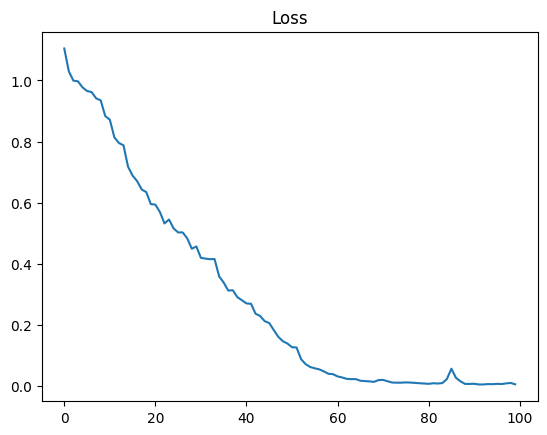

In [27]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

79/79 [==============================] - 0s 1ms/step


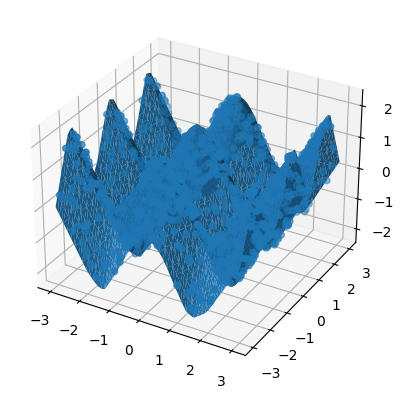

In [50]:
ax = plot3d()

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)

X_test = np.vstack((xx.flatten(), yy.flatten())).T
y_pred = model.predict(X_test).flatten()

ax.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred)
plt.show()